# **MOVIE_REVENUE_PREDICTOR**
### **`Background`**

`Royal Empire Company` recently announced that the company was planning on launching new subsidiary companies with an aim of diversifying its porfolio. Among the companies to be launched is a production company, `Royal Empire Movie Studio`, which will involve the production and marketing of original and franchise movies. Commissioned by the company, this projects aims to try and predict movie revenues based on several movie factors. The insights will help stakeholders make informed data-driven decisions on the starting and running of the movie studio.

## **Business Understanding**
### Business Overview
The film industry incorporates all of the technological and commercial aspects of filmmaking. This includes production companies, studios, cinematography, distribution, and a lot more. Some of the most important aspects in the industry include;

- Production: This involves the creative process of making films, including screenwriting, pre-production, filming, and post-production.

- Marketing: This involves activities aimed at promoting a movie to attract audiences and maximize revenue. It involves strategies like market research, target audience identification, and leveraging both traditional and digital media.

- Distribution: This covers the methods used to get films to audiences, such as cinemas, television, online platforms, and other media outlets. 

- Monetizing: This involves the various methods used to generate revenue from films. These strategies include traditional avenues like theatrical releases, DVD sales, and television licensing, as well as newer digital approaches such as streaming and online video-on-demand (VOD) platforms.

### Project Overview
Despite the film industry being a multi-billion dollar market, predicting a movie's financial success has remained a challenge. This project will be exploring whether a machine learning model can estimate a film's box office revenue based on its features such as budget, genre, cast, director and audience ratings.

This project also serves as an opportunity to practice Object-Oriented Programming (OOP) in data science workflows, improving modularity, readability, and scalability of the ML pipeline.

### Project Objective
- The primary goal of the project is to assist the company's production teams, investors, and other stakeholders in making data-driven decisions when evaluating new projects.

### Stakeholders
- Studio executives: Make key decisions regarding project development, financing, and distribution. 

- Investors: Provide the financial backing for the film. 

### Techniques used in the project
The project will be applying the folowing to uncover patterns behind movie performance;
- data preprocessing

- feature engineering

- supervised learning techniques


## **Data Understanding**
### Data Source
To help answer our question, we will be using a dataset generated from The Movie Database (TMDB) API that we downloaded from [kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

Under the file path `Data/RawData/` you can find the raw data files that contain information about several movies with additional information about their crews and cast members. The 2 datasets, namely the `tmdb_500_movies.csv` and the `tmdb_5000_credits.csv` contain features such as movie budgets, revenue, title, genre, popularity, release date, votes, crew, cast among others.

### Why is the data suitable for the project?
The dataset contains rich, diverse data points such as film budget, financial success, genre, popularity, and votes that can be used to train algorithms to predict various outcomes. 

### Initial Analysis
In this section, we are importing all the dependencies/libraries that we will be using in the project, loading the dataset and analyzing it to understand it's structure as well as checking if the quality of the data is good. This is important as without proper data quality tests, businesses risk making decisions based on flawed or incomplete information, which could lead to business failure, etc. 

#### Importing dependencies
For efficience and accessibility, we will be using; 
- Pandas

- NumPy

- Matplotlib

- Seaborn

- Scikit-Learn 

In the first code, we are importing the libraries named above. 

In [1]:
# Import dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datetime import datetime

#### Loading the dataset and parsing the dataset.
As mentioned above, we will be using this project as an opportunity to practice our OOP.

In the the first block of code we are building a class that loads the movie datasets into the notebook, merges them so that we only deal with one dataset. This is important as it will make it easy to keep up with the data and all the cleansing will be done all at once, avoiding redundant codes.

The class will also perform qualitatitive and quantitative analysis, helping us understand the structure and contents of the datasets. The analysis will include finding the shape, returning the structure information and statistical summary of the data, it will also check for missing values and duplicated records.

In [2]:
# Create a class that loads data, previews it, and carries out qualitative and quantitative analysis on it.

class MovieDataLoader:
    def __init__(self, movie_path, credits_path):
        self.movie_path = movie_path
        self.credits_path = credits_path
        self.movies_df = None
        self.credits_df = None
        self.merged_df = None

    # Loads the dataset into the notebook using Pandas .read_csv() method.
    def load_data(self): 
        try:
            self.movies_df = pd.read_csv(self.movie_path)
            self.credits_df = pd.read_csv(self.credits_path)
            print("Data loaded successfully.")
        except Exception as e:
            print(f"Error loading files: {e}")

    # Merges the datasets into one using Pandas .merge() method.
    def merge_data(self): 
        if self.movies_df is not None and self.credits_df is not None:
            self.merged_df = pd.merge(self.movies_df, self.credits_df, left_on='id', right_on='movie_id')
            print("Data merged successfully.")
        else:
            print("Load data before merging.")

    # Previews the dataset by returning the first 5 rows. Uses the .head() method.
    def preview_data(self, n=5):
        if self.merged_df is not None:
            return self.merged_df.head(n)
        else:
            print("Data not merged yet.")

    # Retrieves the shape of the dataset using the .shape method.
    def get_shape(self):
        if self.merged_df is not None:
            return self.merged_df.shape
        else:
            return "Data not available yet."
        
    # Returns the dataset's consice summary, helps understand the structure of the data.
    def get_info(self):
        if self.merged_df is not None:
            return self.merged_df.info()
        else:
            return "Load and merge data first."

    # Checks for missing values.
    def check_missing(self):
        if self.merged_df is not None:
            return self.merged_df.isnull().sum()
        else:
            return "Load and merge data first."
        
    # Checks for duplicate records.
    def check_duplicates(self):
        if self.merged_df is not None:
            return self.merged_df.duplicated().sum()
        else:
            return "Load and merge data first."
        
    # Returns the statistical summary of the dataset.    
    def get_stats_summary(self):
        if self.merged_df is not None:
            return self.merged_df.describe()
        else:
            return "Load and merge data first."

In [3]:
# Load the datasets and merge them.
movies_info = MovieDataLoader("../Data/RawData/tmdb_5000_movies.csv", "../Data/RawData/tmdb_5000_credits.csv")

movies_info.load_data()
movies_info.merge_data()

# Preview results.
print(movies_info.get_shape())
movies_info.preview_data()

Data loaded successfully.
Data merged successfully.
(4803, 24)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


The dataset contains structured data stored in 4803 rows and 24 columns. The columns contain values stored as floats, integers and objects. From the preview, we notice that some columns contain nested structures and some contain the same information.

Next we are getting the summarized info on the dataset.

In [4]:
# Get dataset structure info.
movies_info.get_info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

The structure of the dataset is as follows;
- Shape: 4803, 24

- Datatypes: 3 floats, 5 integers and 16 objects

- Null values: homepage, overview, release_date, runtime, and tagline columns contain null values.

- Wrong data-type: release_date is stored as objects instead of datetime. Also, we saw that some columns contain nested structures but are stored as objects.

Next we are going to look at the numer of missing values in the columns and if we have any duplicated records.

In [5]:
# Check missing values and duplicates.
print(movies_info.check_missing())
movies_info.check_duplicates()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
movie_id                   0
title_y                    0
cast                       0
crew                       0
dtype: int64


0

The data has no duplicated records but has missing values in several columns but mostly in 2 columns.

In the next code we are looking at the quantitative summary of the dataset including the numerical data's measures of central tendencies, measures of spread and some aggregate functions.

In [6]:
movies_info.get_stats_summary()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,57165.484281
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,88694.614033
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,9014.500000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14629.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,58610.500000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


Through this summary, we found that we have records in the dataset that contain placeholders. For example, the budget, runtime, and revenue columns `min` is 0, which logically is impossible. The other columns also contain the same, adding to the theory that th number 0 was used as a placeholder.

### Data Quality Issues.
Upon exloring the dataset, we found that the data contains several data quality issues, they include:
- Incomplete records: The data contains columns that have missing values and others that contain placeholders.

- Inaccurate records: There is a column that contains values stored in the wrong data type.

- Irrelevant columns: The dataset has 24 columns, most of which are not relevant to the project, irrelevant columns can negatively impact a prediction model. They can decrease accuracy, and make the model harder to interpret. They also add noise to the data, potentially leading to overfitting.

- Duplicated columns: The dataset has 3 columns that have the same content, namely `original_title`, `title_x`, and `title_y`.

## **Data Preparation**
In the previous section, we found that the data has a couple of data quality issues including incomplete records, irrelevant to our project columns etc. In this section we will be preparing the data for analysis. This process will include;
- Data cleaning

- Feature engineering

- Data conversion

We will be creating a class that will contain methods that will:
- **clean numeric columns**: During our data Understandiong we found that almost all of the numerical columns have placeholders of 0. This method will convert them to numeric and filter out rows with 0 in budget and revenue. This is because this will have negative impacts on our prediction model. For the rest of the numerical data, the method will fill them with either the median or mean. 

- **Parse fields**: We also found some columns had JSON-like content, that is, they had nested structures. This method will extract a list of values from a column that looks like JSON but is actually stored as a string.

- **Extract values**: The *parse fields* method will be used in these methods to extract values from the various columns containing information in nested structures.

- **Convert data types**: The initial analysis uncovered that some columns were stored as wrong data types, this method will convert the column to the right data type and engineer new features from the converted data.

- **Compute Return On Investment**: This method will engineer a new feature containing the ROI on the respective films, creating a new column.

- **Filter data**: Finally, we identified some irrelevant columns, in this method we will be filtering them out to remain with the data relevant to our model later in the project.

In [7]:
# # Create a class that prepares the data for analysis.
class MoviePreprocessor:
    def __init__(self, df):
        self.df = df.copy()
        self.cleaned_df = None

    def clean_numeric_columns(self):
        print("Cleaning numeric columns...")

        # Convert columns to numeric
        numeric_cols = ['budget', 'revenue', 'runtime', 'vote_count', 'popularity']
        for col in numeric_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

        # Filter out rows with placeholder 0s in budget or revenue
        self.df = self.df[(self.df['budget'] > 0) & (self.df['revenue'] > 0)]

        # Handle missing values (optional: could drop or fill)
        self.df['runtime'].fillna(self.df['runtime'].median(), inplace=True)
        self.df['vote_count'].fillna(0, inplace=True)
        self.df['popularity'].fillna(self.df['popularity'].mean(), inplace=True)

        print("Numeric columns cleaned.")

    def _parse_json_field(self, field, key):
        """Parse a JSON-like column and extract a list of specified keys (e.g., genres)."""
        return [i[key] for i in ast.literal_eval(field)] if field != '[]' else []

    def extract_genres(self):
        self.df['genres'] = self.df['genres'].apply(lambda x: ', '.join(self._parse_json_field(x, 'name')))

    def extract_director(self):
        def get_director(crew_data):
            for person in ast.literal_eval(crew_data):
                if person['job'] == 'Director':
                    return person['name']
            return None
        self.df['director'] = self.df['crew'].apply(get_director)

    def extract_top_cast(self, top_n=3):
        def get_cast(cast_data):
            return ', '.join([person['name'] for person in ast.literal_eval(cast_data)[:top_n]])
        self.df['top_cast'] = self.df['cast'].apply(get_cast)

    def convert_release_date(self):
        self.df['release_date'] = pd.to_datetime(self.df['release_date'], errors='coerce')
        self.df['release_year'] = self.df['release_date'].dt.year
        self.df['release_month'] = self.df['release_date'].dt.month

    def compute_roi(self):
        self.df = self.df[(self.df['budget'] > 0) & (self.df['revenue'] > 0)]
        self.df['roi'] = (self.df['revenue'] - self.df['budget']) / self.df['budget']

    def drop_unused_columns(self):
        keep = ['original_title', 'budget', 'revenue', 'genres', 'release_year',
                'release_month', 'runtime', 'vote_average', 'vote_count',
                'popularity', 'top_cast', 'director', 'roi']
        self.cleaned_df = self.df[keep].dropna()

    def run_all(self):
        print("Cleaning & transforming data...")
        self.clean_numeric_columns()
        self.extract_genres()
        self.extract_director()
        self.extract_top_cast()
        self.convert_release_date()
        self.compute_roi()
        self.drop_unused_columns()
        print("Preprocessing complete.")
        return self.cleaned_df

In [8]:
# Clean the data.
preprocessor = MoviePreprocessor(movies_info.merged_df)
clean_df = preprocessor.run_all()

# Preview the cleaned data.
clean_df.head()

Cleaning & transforming data...
Cleaning numeric columns...
Numeric columns cleaned.
Preprocessing complete.


,original_title,budget,revenue,genres,release_year,release_month,runtime,vote_average,vote_count,popularity,top_cast,director,roi
0,Avatar,237000000,2787965087,"Action, Adventure, Fantasy, Science Fiction",2009,12,162.0,7.2,11800,150.437577,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,10.763566
1,Pirates of the Caribbean: At World's End,300000000,961000000,"Adventure, Fantasy, Action",2007,5,169.0,6.9,4500,139.082615,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,2.203333
2,Spectre,245000000,880674609,"Action, Adventure, Crime",2015,10,148.0,6.3,4466,107.376788,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes,2.594590
3,The Dark Knight Rises,250000000,1084939099,"Action, Crime, Drama, Thriller",2012,7,165.0,7.6,9106,112.312950,"Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan,3.339756
4,John Carter,260000000,284139100,"Action, Adventure, Science Fiction",2012,3,132.0,6.1,2124,43.926995,"Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton,0.092843


Now, our data is cleaned and prepared for modeling.

## **Exploratory Data Analysis (EDA)**
In this section, we will be doing exploratory data analysis, this is crucial for our project as it helps us understand the shape and pattern of our data. It also helps us uncover patterns, or biases in our data.

Additionally, it will help us identify outliers, which could be detrimental to our model or preprocessing as some methods do not do well with outliers, knowing if a feature has one prior will help us choose the most suitable preprocessing method. 

We will be using seaborn and matplotlib python modules for visualization.

In the next code we are going to create an EDA class, it will have methods that will help us explore our cleaned data further.

In [19]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [31]:
# Create EDA class.

class MovieEDA:
    plt.style.use('dark_background') # -> Set the plot style.

    def __init__(self, data, figsize=(10, 6)):
        self.data = data
        self.figsize = figsize

    def revenue_distribution(self): # -> Plot revenue distribution.
        plt.figure(figsize=self.figsize)
        sns.histplot(self.data['revenue'], bins=30, kde=True, color='teal')
        plt.title('Revenue Distribution')
        plt.xlabel('Revenue')
        return plt.show()

    def revenue_vs_budget(self): # -> Plot revenue vs budget.
        plt.figure(figsize=self.figsize)
        sns.scatterplot(data=self.data, x='budget', y='revenue', hue='release_year', palette='cool')
        plt.title('Revenue vs Budget')
        plt.xlabel('Budget')
        plt.ylabel('Revenue')
        return plt.show()

    def top_directors(self, n=10): # -> Plot top directors by average return on investment (ROI).
        top_directors = self.data.groupby('director')['roi'].mean().sort_values(ascending=False).head(n)
        plt.figure(figsize=self.figsize)
        top_directors.plot(kind='barh', color='darkorange')
        plt.title(f'Top {n} Directors by Average ROI')
        plt.xlabel('ROI')
        plt.gca().invert_yaxis()
        return plt.show()

    def correlation_matrix(self): # -> Plot feature correlation.
        plt.figure(figsize=self.figsize)
        sns.heatmap(self.data.corr(), cmap='Purples', annot=True, fmt=".2f")
        plt.title("Correlation Matrix")
        return plt.show()

    def multicollinearity(self, threshold=0.75): # -> Identify which features have the highest correlation.
        corr_matrix = self.data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        result = upper.stack().reset_index()
        result.columns = ['Feature 1', 'Feature 2', 'Correlation']
        return result[result['Correlation'] > threshold]

    def avg_roi_by_genre(self, n=10): # -> Plot average ROI by genre.
        genre_df = self.data.copy()
        genre_df['genre_split'] = genre_df['genres'].str.split(', ')
        genre_exploded = genre_df.explode('genre_split')
        top_genres = genre_exploded.groupby('genre_split')['roi'].mean().sort_values(ascending=False).head(n)
        
        plt.figure(figsize=self.figsize)
        top_genres.plot(kind='barh', color='mediumseagreen')
        plt.title(f'Top {n} Genres by Average ROI')
        plt.xlabel('ROI')
        plt.gca().invert_yaxis()
        return plt.show()

    def vote_score_vs_revenue(self): # -> Plot vote_score vs revenue.
        plt.figure(figsize=self.figsize)
        sns.scatterplot(data=self.data, x='vote_average', y='revenue', hue='release_year', palette='viridis')
        plt.title('Vote Score vs Revenue')
        return plt.show()

    def release_trend(self): # -> Plot release trends.
        yearly_stats = self.data.groupby('release_year').agg({'revenue': 'mean', 'budget': 'mean'}).dropna()
        plt.figure(figsize=self.figsize)
        sns.lineplot(data=yearly_stats, palette='mako')
        plt.title('Average Revenue & Budget Over Years')
        return plt.show()

### Revenue Distribution
In the next code we will be instantiating the revenue_distribution(), this will help us identify how the feature is distributed, or what kind of distribution does it have.

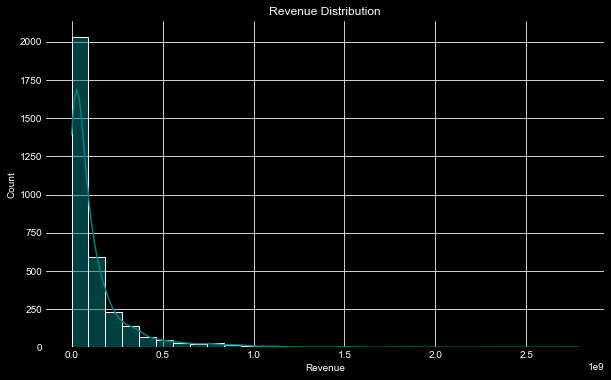

In [23]:
# Instatiate the class.
eda = MovieEDA(clean_df)

# Plot revenue distribution.
eda.revenue_distribution()

The revenue columns has an exponential distribution, with most of the values being 0, the placeolder. The distribution also has a lond tail, hinting that there may be outliers.

### Revenue vs Budget
This code seeks to see how films performed financially against their production budgets and to uncover if the production budget has any influence on the films financial success.

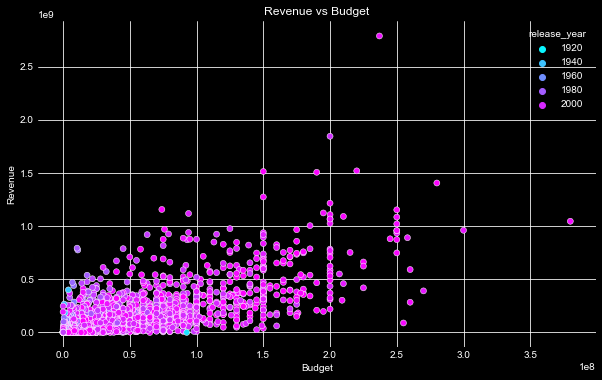

In [24]:
# Plot revenue vs budget
eda.revenue_vs_budget()

In the plot above the first thing we notice is that we have outliers, and the two features do not have the same scales. We also notice that the dots are clustered at the bottom of the plot, this may be indication that high production budgets may not necessarily mean higher financial success, albeit we have some films that have performed well despite their low budgets.

### Average ROI by Genre
Here we are trying to figure out if there is any pattern between returns on investment and movie genres. This is crucial as it will help us understand if the movie genre has any influence on the revenue.

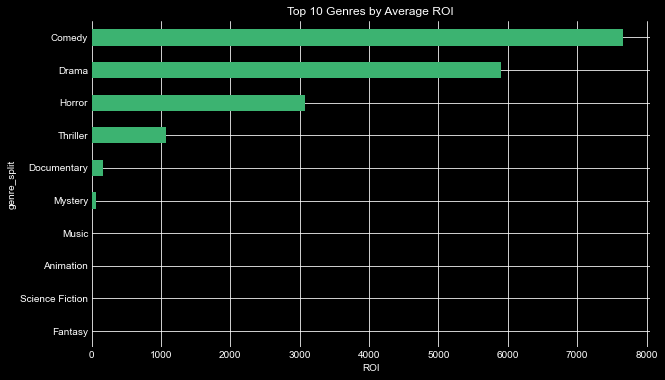

In [25]:
eda.avg_roi_by_genre()

According to the plot above, there is a strong relationship between comedy films and ROIs, followed closely by drama, horror and thriller. 

### Top Directors by ROI.
Directors play a very crucial role in film development, this plot seeks to find directors with the highest average ROI.

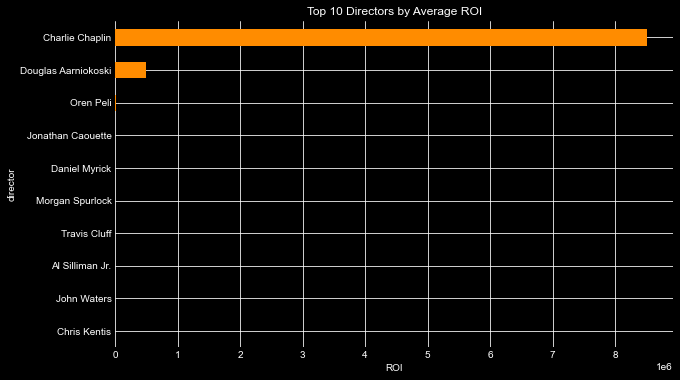

In [26]:
# Plot top directors by average ROI.
eda.top_directors()

Charlie Chaplin is the director with the highest ROI average at around 8.5 million dollars, Douglas Aarniokoski follows behind at around 0.5 million dollars in ROI.

### Vote_score vs Revenue
Here we are trying to understand the relationship between vote_score and revenue, does vote_score influence the films financial success?

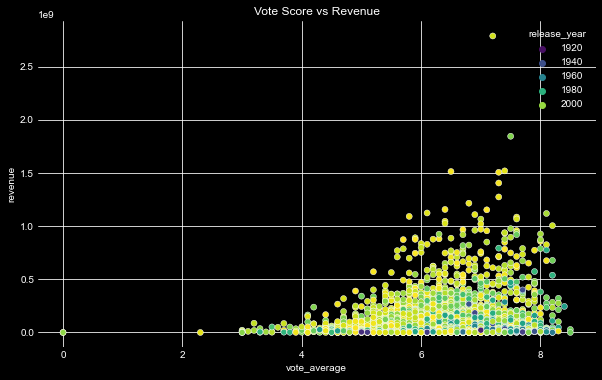

In [27]:
# Plot vote_score vs revenue.
eda.vote_score_vs_revenue()

There are a lot of films with average votes between 4 and 8, and they performed moderately. However, their financial performance may have been underplayed by the outliers present in the dataset causing thme to seem moderate.

### Average Revenue and Budget Over Years
In this section we'll be checking the distribution of production budgets and revenues over the years.

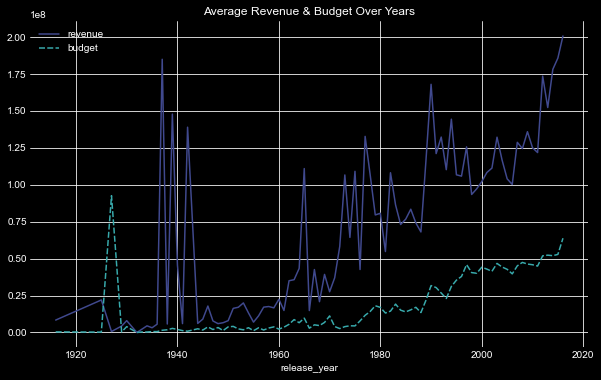

In [ ]:
# Plot release trend.
eda.release_trend()

In some of the seasons between the 1930s and 1950s the films were doing really well despite the low production budgets they were developed on. As the years went on, bith the production budgets
and the revenue have been increasing showing stability and innovation.

### Correlation Matrix and checking Multicollinearity.
Here we will be checking if the features are correlated to each other. 

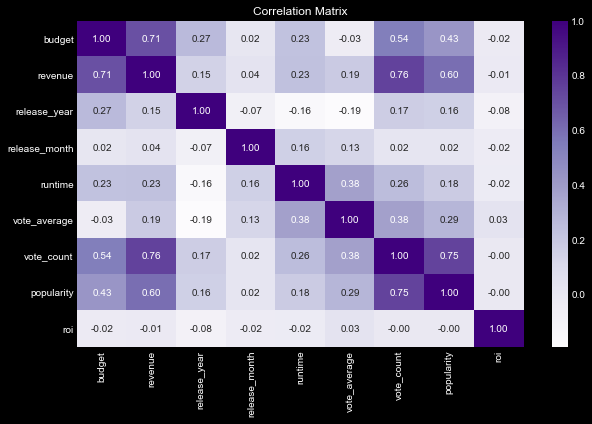

In [29]:
eda.correlation_matrix()

In [30]:
eda.multicollinearity()

,Feature 1,Feature 2,Correlation
12,revenue,vote_count,0.756144


In the last two codes, revenue and vote_count have the highest correlation, but since we are actually predicting the revenue, there is no need to drop either one of them. The other features that are correlated, are just moderate and they pose no threat to the stability of our model.

## **Preprocessing**